In [ ]:
#Context
#An international e-commerce company based wants to discover key insights from their customer database.
#They want to use some of the most advanced machine learning techniques to study their customers. 
#The company sells electronic products.

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [74]:
data=pd.read_csv('Train.csv')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [123]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,1,4,2,177,3,1,F,44,1233,1
1,5,1,4,5,216,2,1,M,59,3088,1
2,1,1,2,2,183,4,1,M,48,3374,1
3,2,1,3,3,176,4,2,M,10,1177,1
4,3,1,2,2,184,3,2,F,46,2484,1


<AxesSubplot:>

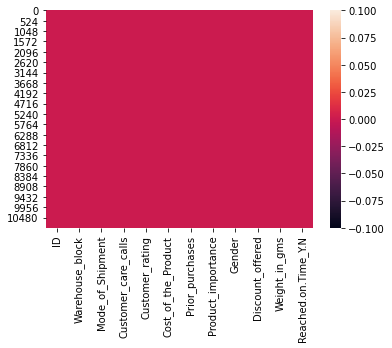

In [77]:
sns.heatmap(data.isnull())

In [118]:
data.loc[data['Mode_of_Shipment']=='Flight','Mode_of_Shipment']=1
data.loc[data['Mode_of_Shipment']=='Ship','Mode_of_Shipment']=2
data.loc[data['Mode_of_Shipment']=='Road','Mode_of_Shipment']=3

In [122]:
data.loc[data['Product_importance']=='low','Product_importance']=1
data.loc[data['Product_importance']=='medium','Product_importance']=2
data.loc[data['Product_importance']=='high','Product_importance']=3

In [131]:
gender=pd.get_dummies(data['Gender'],drop_first=True)
gender


,M
0,0
1,1
2,1
3,1
4,0
...,...
10994,0
10995,0
10996,0
10997,1


In [133]:
data=data.join(gender)

In [134]:
data=data.drop(['Gender'],axis=1)

In [135]:
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,M
0,4,1,4,2,177,3,1,44,1233,1,0
1,5,1,4,5,216,2,1,59,3088,1,1
2,1,1,2,2,183,4,1,48,3374,1,1
3,2,1,3,3,176,4,2,10,1177,1,1
4,3,1,2,2,184,3,2,46,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10994,1,2,4,1,252,5,2,1,1538,1,0
10995,2,2,4,1,232,5,2,6,1247,0,0
10996,3,2,5,4,242,5,1,4,1155,0,0
10997,5,2,5,2,223,6,2,2,1210,0,1


In [136]:
data.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'M'],
      dtype='object')

In [78]:
data.loc[data['Warehouse_block']=='A','Warehouse_block']=1
data.loc[data['Warehouse_block']=='B','Warehouse_block']=2
data.loc[data['Warehouse_block']=='C','Warehouse_block']=3
data.loc[data['Warehouse_block']=='D','Warehouse_block']=4
data.loc[data['Warehouse_block']=='F','Warehouse_block']=5

<AxesSubplot:>

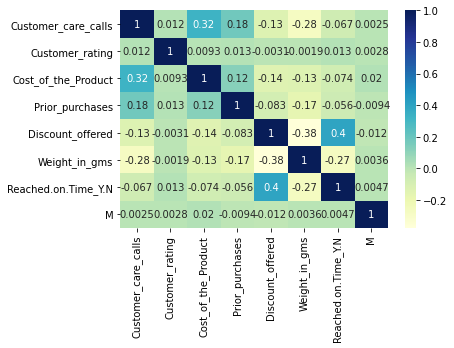

In [137]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [138]:
#its look like ,discount offered is more correlational with reached on time

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

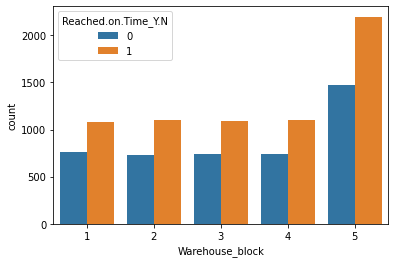

In [139]:
sns.countplot(x='Warehouse_block',data=data,hue='Reached.on.Time_Y.N')

In [82]:
#with warehouse block the output is not depending .

In [84]:
#sns.swarmplot(x='Warehouse_block',y='Weight_in_gms',data=data)

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

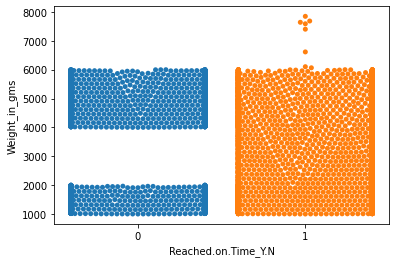

In [85]:
sns.swarmplot(x='Reached.on.Time_Y.N',y='Weight_in_gms',data=data)

In [86]:
#weight does not depicting much about the output,but the point to note here is all the weights from 2000 to 4000
#are always not reached on time.

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

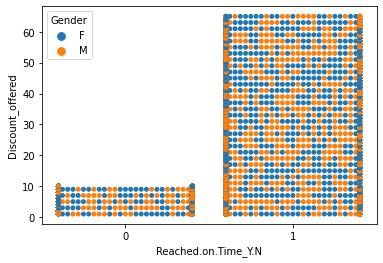

In [87]:
sns.swarmplot(x='Reached.on.Time_Y.N',y='Discount_offered',data=data,hue='Gender')

In [88]:
#the discounts which were offered 10 and above were always not reached on time ,the one with 0 and 10 having 50-50 chance 

In [89]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

<AxesSubplot:xlabel='Customer_rating', ylabel='count'>

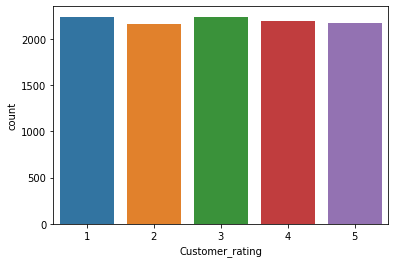

In [90]:
sns.countplot(x='Customer_rating',data=data)

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Product_importance', ylabel='Customer_rating'>

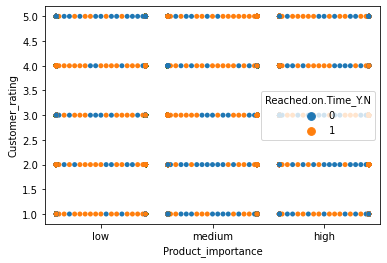

In [91]:
sns.swarmplot(y='Customer_rating',x='Product_importance',data=data,hue='Reached.on.Time_Y.N')

In [140]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,M
0,4,1,4,2,177,3,1,44,1233,1,0
1,5,1,4,5,216,2,1,59,3088,1,1
2,1,1,2,2,183,4,1,48,3374,1,1
3,2,1,3,3,176,4,2,10,1177,1,1
4,3,1,2,2,184,3,2,46,2484,1,0


In [93]:
data=data.drop(['ID'],axis=1)

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

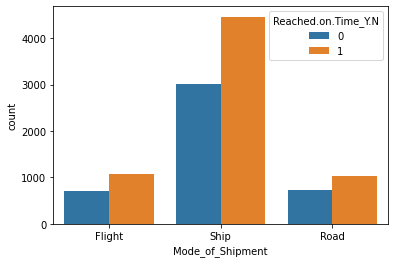

In [94]:
sns.countplot(x='Mode_of_Shipment',data=data,hue='Reached.on.Time_Y.N')

In [95]:
#as you see ship is the most used transport and reached on time is less in every mode

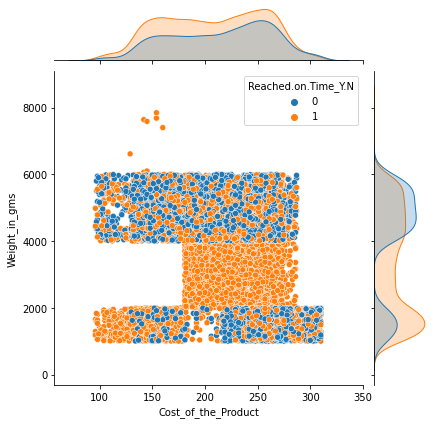

In [96]:
sns.jointplot(x='Cost_of_the_Product',y='Weight_in_gms',data=data,hue='Reached.on.Time_Y.N')

In [97]:
#as we know cost is not correlated with weight and also to reaching on time

In [98]:
data.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

<AxesSubplot:xlabel='Prior_purchases', ylabel='Customer_rating'>

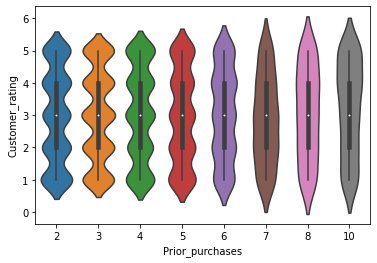

In [99]:
sns.violinplot(x='Prior_purchases',y='Customer_rating',data=data)

In [100]:
#the rating on a company is not varying with the customer with more prior purchases

<AxesSubplot:xlabel='Prior_purchases', ylabel='count'>

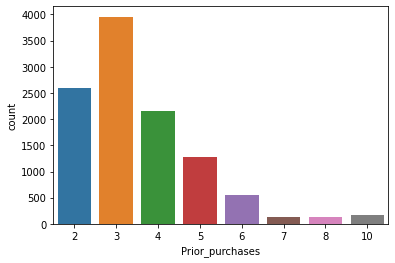

In [101]:
sns.countplot(x="Prior_purchases",data=data)

In [102]:
n=data[data['Prior_purchases']==3]

In [103]:
n

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,Flight,4,2,177,3,low,F,44,1233,1
4,3,Flight,2,2,184,3,medium,F,46,2484,1
5,5,Flight,3,1,162,3,medium,F,12,1417,1
6,4,Flight,3,4,250,3,low,F,3,2371,1
8,1,Flight,3,4,150,3,low,F,11,1861,1
...,...,...,...,...,...,...,...,...,...,...,...
10906,3,Ship,4,1,261,3,low,F,3,4673,1
10912,3,Ship,4,2,258,3,medium,F,9,4977,1
10949,5,Road,3,4,202,3,medium,M,7,1946,0
10954,3,Road,4,1,261,3,low,F,8,5206,1


In [104]:
type(n)

pandas.core.frame.DataFrame

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Prior_purchases', ylabel='Customer_rating'>

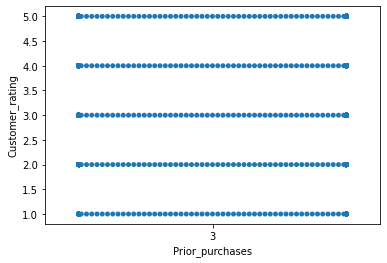

In [105]:
sns.swarmplot(x='Prior_purchases',y='Customer_rating',data=n)

In [106]:
# the people with prior purchases of 3 were more, but still they have equal ratings from1 to 5,it shows that the company is not doing well

In [107]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,Flight,4,2,177,3,low,F,44,1233,1
1,5,Flight,4,5,216,2,low,M,59,3088,1
2,1,Flight,2,2,183,4,low,M,48,3374,1
3,2,Flight,3,3,176,4,medium,M,10,1177,1
4,3,Flight,2,2,184,3,medium,F,46,2484,1


In [108]:
data['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [109]:
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,Flight,4,2,177,3,low,F,44,1233,1
1,5,Flight,4,5,216,2,low,M,59,3088,1
2,1,Flight,2,2,183,4,low,M,48,3374,1
3,2,Flight,3,3,176,4,medium,M,10,1177,1
4,3,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,1,Ship,4,1,252,5,medium,F,1,1538,1
10995,2,Ship,4,1,232,5,medium,F,6,1247,0
10996,3,Ship,5,4,242,5,low,F,4,1155,0
10997,5,Ship,5,2,223,6,medium,M,2,1210,0


In [142]:
X=data[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms', 'M']]
y=data['Reached.on.Time_Y.N']

In [143]:
data.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'M'],
      dtype='object')

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

In [147]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57       895
           1       0.70      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200

[[505 390]
 [377 928]]


In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       895
           1       0.75      0.63      0.69      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200

[[626 269]
 [481 824]]


In [149]:
#logistic regression

In [150]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression()
dt.fit(X_train,y_train)
predi=dt.predict(X_test)

In [151]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57       895
           1       0.70      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200

[[505 390]
 [377 928]]


In [152]:
#knn

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler=StandardScaler()

In [155]:
scaler.fit(data.drop(['Reached.on.Time_Y.N'],axis=1))

StandardScaler()

In [156]:
scaled=scaler.transform(data.drop(['Reached.on.Time_Y.N'],axis=1))

In [157]:
scaled_df=pd.DataFrame(scaled,columns=data.columns.drop('Reached.on.Time_Y.N'))

In [158]:
scaled_df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,M
0,0.447189,-1.760714,-0.047711,-0.700755,-0.690722,-0.372735,-0.942576,1.889983,-1.468240,-0.991760
1,1.118034,-1.760714,-0.047711,1.421578,0.120746,-1.029424,-0.942576,2.815636,-0.333893,1.008308
2,-1.565345,-1.760714,-1.799887,-0.700755,-0.565881,0.283954,-0.942576,2.136824,-0.159002,1.008308
3,-0.894500,-1.760714,-0.923799,0.006689,-0.711529,0.283954,0.616430,-0.208162,-1.502484,1.008308
4,-0.223656,-1.760714,-1.799887,-0.700755,-0.545074,-0.372735,0.616430,2.013404,-0.703244,-0.991760
...,...,...,...,...,...,...,...,...,...,...
10994,-1.565345,0.002726,-0.047711,-1.408199,0.869792,0.940643,0.616430,-0.763553,-1.281730,-0.991760
10995,-0.894500,0.002726,-0.047711,-1.408199,0.453655,0.940643,0.616430,-0.455002,-1.459679,-0.991760
10996,-0.223656,0.002726,0.828377,0.714133,0.661724,0.940643,-0.942576,-0.578423,-1.515937,-0.991760
10997,1.118034,0.002726,0.828377,-0.700755,0.266394,1.597332,0.616430,-0.701843,-1.482304,1.008308


In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
A=scaled_df
b=data['Reached.on.Time_Y.N']

In [161]:
A_train, A_test, b_train, b_test = train_test_split(A,b, test_size = 0.2, random_state = 42)

In [162]:
knn=KNeighborsClassifier(n_neighbors=20)

In [163]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [164]:
pr=knn.predict(X_test)

In [165]:
print(classification_report(b_test,pr))
print(confusion_matrix(b_test,pr))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       895
           1       0.77      0.60      0.68      1305

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.69      0.66      0.66      2200

[[664 231]
 [520 785]]


In [166]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(A_train,b_train)
    pred_i = knn.predict(A_test)
    error_rate.append(np.mean(pred_i != b_test))

Text(0, 0.5, 'Error Rate')

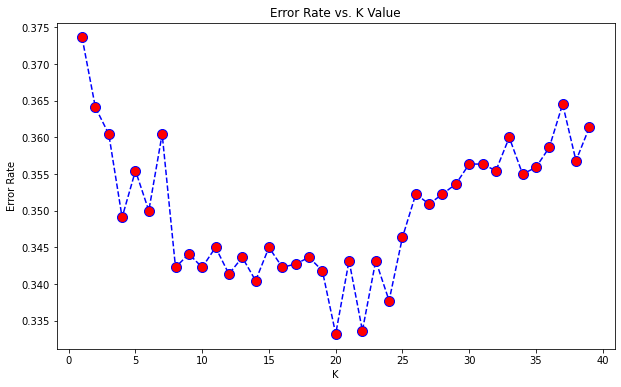

In [167]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [168]:
#its look like ,discount offered is more correlational with reached on time
#with warehouse block the output is not depending .
#weight does not depicting much about the output,but the point to note here is all the weights from 2000 to 4000
#are always not reached on time.
#the discounts which were offered 10 and above were always not reached on time ,the one with 0 and 10 having 50-50 chance 
#as you see ship is the most used transport and reached on time is less in every mode
#as we know cost is not correlated with weight and also to reaching on time
#the rating on a company is not varying with the customer with more prior purchases
# the people with prior purchases of 3 were more, but still they have equal ratings from1 to 5,it shows that the company is not doing well
